# I. Using the Friends dataset build words embeddings using GENSIM and word2vec

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import gzip
import gensim
import logging
import pandas as pd
from gensim.utils import simple_preprocess
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential

In [3]:
# TODO: Comentar ruta_dataset de abajo que es la ruta de colab, y la local para jupyter es la de arriba
ruta_dataset = 'drive/MyDrive/docs/dialogs_friends_filter.csv'
# ruta_dataset = 'drive/MyDrive/dialogs_friends_filter.csv'

df = pd.read_csv(ruta_dataset).dropna()

# imprima las primeras 5 filas
df.head()

print(df.shape)
df.head(20) # returns (rows, columns)

(46514, 2)


,raw_character_text,spoken_words
0,Monica,There's nothing to tell! He's just some guy I ...
1,Joey,"C'mon, you're going out with the guy! There's ..."
2,Chandler,"All right Joey, be nice. So does he have a hu..."
3,Phoebe,"Wait, does he eat chalk?"
4,Phoebe,"Just, 'cause, I don't want her to go through w..."
5,Monica,"Okay, everybody relax. This is not even a date..."
6,Chandler,Sounds like a date to me.
7,Chandler,"Alright, so I'm back in high school, I'm stand..."
8,Chandler,"Then I look down, and I realize there's a phon..."
9,Joey,Instead of...?


In [4]:
def preproccess(line):
    return simple_preprocess(line)

df['proccesed'] = df['spoken_words'].apply(preproccess)
df.head(10)

,raw_character_text,spoken_words,proccesed
0,Monica,There's nothing to tell! He's just some guy I ...,"[there, nothing, to, tell, he, just, some, guy..."
1,Joey,"C'mon, you're going out with the guy! There's ...","[mon, you, re, going, out, with, the, guy, the..."
2,Chandler,"All right Joey, be nice. So does he have a hu...","[all, right, joey, be, nice, so, does, he, hav..."
3,Phoebe,"Wait, does he eat chalk?","[wait, does, he, eat, chalk]"
4,Phoebe,"Just, 'cause, I don't want her to go through w...","[just, cause, don, want, her, to, go, through,..."
5,Monica,"Okay, everybody relax. This is not even a date...","[okay, everybody, relax, this, is, not, even, ..."
6,Chandler,Sounds like a date to me.,"[sounds, like, date, to, me]"
7,Chandler,"Alright, so I'm back in high school, I'm stand...","[alright, so, back, in, high, school, standing..."
8,Chandler,"Then I look down, and I realize there's a phon...","[then, look, down, and, realize, there, phone,..."
9,Joey,Instead of...?,"[instead, of]"


In [5]:
documents = df['proccesed'].to_numpy()

### Generate 150 sized Word2vec embbedings

In [6]:
#TODO: Descomentar esta y comentar la otra, por alguna razon no es vector_size si no size en colab
model_150 = gensim.models.Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)
#model_150 = gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10, sg=1)

model_150.train(documents, total_examples=len(documents), epochs=10)

(3686114, 5213860)

In [7]:
model_150.save("Friends_150_5.model")

In [8]:
print(model_150.wv['everybody'])

[ 0.22607931 -0.17272873  0.06488743 -0.2568457  -0.26758173  0.28254592
 -0.09741213 -0.27098307 -0.18296501 -0.11525666  0.20429523  0.11599481
 -0.2621406  -0.13764709  0.02311461 -0.23755874  0.5429118  -0.12309107
 -0.35519683  0.07987636 -0.48879868 -0.23643506  0.45918882 -0.20109405
 -0.04959606  0.03427742  0.22576055  0.11069165 -0.24931453 -0.12398552
 -0.16584608 -0.5896523  -0.354044   -0.37567312  0.07729181 -0.05626167
 -0.15733786 -0.48049042 -0.15559222  0.11047824 -0.324817    0.11386047
 -0.23533303 -0.44947717  0.16083187 -0.09072217 -0.04548325  0.7213528
  0.03173406 -0.04247022 -0.10155164 -0.05884732 -0.22155997 -0.297781
 -0.24157554  0.56308776  0.16098613 -0.5975666  -0.19365577 -0.18770498
 -0.19002269 -0.34923616 -0.00253407  0.09875023  0.07272036 -0.74680096
  0.31321245  0.17966749  0.10272843  0.01450513  0.7282284   0.34659567
 -0.76611185  0.34756958  0.0326685  -0.7459757   0.17605264  0.3000374
  0.10917979 -0.46284026 -0.25417677 -0.17860892  0.493

### Generate 100 sized Word2vec embbedings

In [10]:
#TODO: Descomentar esta y comentar la otra, por alguna razon no es vector_size si no size en colab
model_100 = gensim.models.Word2Vec (documents, vector_size=100, window=10, min_count=2, workers=10, sg=1)
#model_100 = gensim.models.Word2Vec (documents, size=100, window=10, min_count=2, workers=10, sg=1)

model_100.train(documents,total_examples=len(documents),epochs=10)

(3683958, 5213860)

In [11]:
model_100.save("Friends_100_5.model")

In [12]:
print(model_100.wv['everybody'])

[ 0.16898862 -0.5845441   0.24582508  0.19230062 -0.254306    0.22625785
 -0.1141877  -0.2831418  -0.39606783 -0.50044703  0.2616555  -0.12120627
  0.36477318  0.35892326  0.11753351 -0.3404649   0.14056608  0.01440836
  0.5243586  -0.1444913  -0.24938282  0.08404137  0.517771    0.46459872
 -0.31144422  0.21977155 -0.3379766   0.1950083  -0.38289472 -0.19981882
 -0.07487556  0.38925156 -0.45326045 -0.40886515 -0.02904515  0.1430384
  0.14845051 -0.54371935 -0.08288455  0.06954743 -0.10758631  0.0762126
 -0.2497809  -0.29316244  0.15584607 -0.29144064  0.43269798 -0.3164192
 -0.1228588  -0.2017503  -0.10604768 -0.2600075  -0.04310344 -0.18127382
 -0.32654122 -0.14134164  0.20409234 -0.8667591  -0.54403865 -0.5747288
 -0.3892716  -0.5170524  -0.42599064 -0.28776345 -0.04551794 -0.29580763
  0.38510782  0.5822988   0.25123137 -0.08215452  0.4925252  -0.17330101
 -0.21560794  0.549121    0.2156406  -0.6541475   0.11290346  0.25418887
  0.21035206 -0.40719187  0.4814121  -0.40186208  0.035

### Generate 50 sized Word2vec embbedings

In [13]:
#TODO: Descomentar esta y comentar la otra, por alguna razon no es vector_size si no size en colab
model_50 = gensim.models.Word2Vec(documents, vector_size=50, window=10, min_count=2, workers=10, sg=1)
#model_50 = gensim.models.Word2Vec(documents, size=50, window=10, min_count=2, workers=10, sg=1)

model_50.train(documents, total_examples=len(documents),epochs=10)

(3685978, 5213860)

In [14]:
model_50.save("Friends_50_5.model")

In [15]:
df.shape

(46514, 3)

## Load from disk the generated models

In [16]:
model50 = gensim.models.Word2Vec.load("Friends_50_5.model")
model100 = gensim.models.Word2Vec.load("Friends_100_5.model")
model150 = gensim.models.Word2Vec.load("Friends_150_5.model")

In [65]:
len(model50.wv.vectors)

8166

In [66]:
len(model100.wv.vectors)

8166

In [67]:
len(model150.wv.vectors)

8166

In [17]:
model50.wv.similar_by_word('chandler')

[('joey', 0.8493425250053406),
 ('monica', 0.8271433115005493),
 ('ross', 0.8136223554611206),
 ('pleased', 0.7701654434204102),
 ('voices', 0.7676452398300171),
 ('wonders', 0.7527520656585693),
 ('panics', 0.7470481395721436),
 ('rachel', 0.7415343523025513),
 ('trail', 0.7388892769813538),
 ('hence', 0.7339560389518738)]

In [18]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,n), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.savefig(f'./{word}_{n}.jpg')
    plt.show()

# I. 2D Graphs and analysis
***

**Vector dimension:** 50

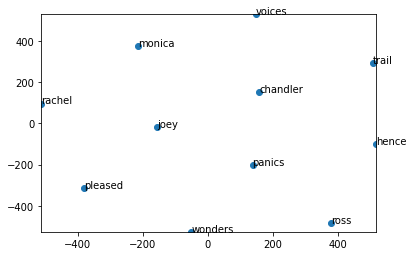

In [19]:
display_closestwords_tsnescatterplot(model50, 'chandler', 50)

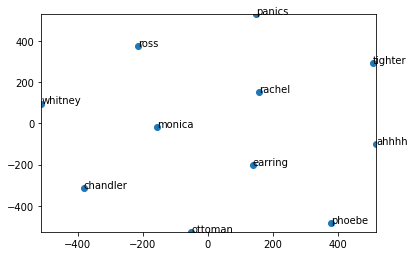

In [20]:
display_closestwords_tsnescatterplot(model50, 'rachel', 50)

**Vector dimension:** 100

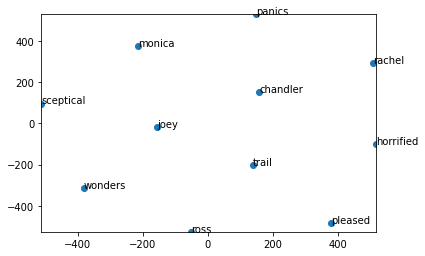

In [21]:
display_closestwords_tsnescatterplot(model100, 'chandler', 100)

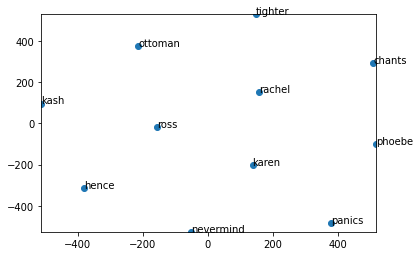

In [22]:
display_closestwords_tsnescatterplot(model100, 'rachel', 100)

**Vector size:** 150

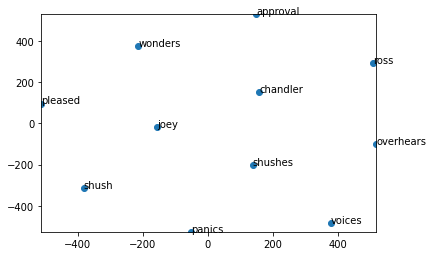

In [23]:
display_closestwords_tsnescatterplot(model150, 'chandler', 150)

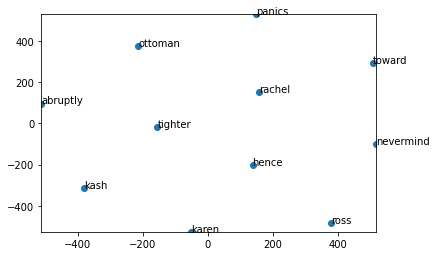

In [24]:
display_closestwords_tsnescatterplot(model150, 'rachel', 150)

# III. Redes neuronales

## Preparacion de los datos

In [77]:
'''
Aquí se filtra el dataset para que solo queden los dialogos relevantes, los de ls personajes principales.
'''
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv(ruta_dataset).dropna() 

# Esto sirve para saber cuantas categorías hay, abajo se usa. Por favor no borrar.
target_friends = ['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross']

In [78]:
'''
Se realiza un Encoding de los nombres de los personajes principales. 
La idea es que cada categoría de personaje este codificada por un vector
1x6 binario. 
'''
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['raw_character_text']])
print(enc.categories_)

[array(['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross'],
      dtype=object)]


In [79]:
'''
Se dividen los datos en 60 training, 20 validación y 20 testing
'''
# df_yelp = df[df['source'] == 'yelp']
sentences = df['spoken_words'].values

y = enc.transform(df[['raw_character_text']]).toarray()
sentences_train_val, sentences_test, y_train_val, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train_val, y_train_val, test_size=0.25, random_state=1000)

# Once we have our handles, we format the datasets in a Keras-fit compatible
# format: a tuple of the form (text_data, label).
train_dataset = tf.data.Dataset.from_tensor_slices((sentences_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((sentences_test, y_test))

# We also create a dataset with only the textual data in it. This will be used
# to build our vocabulary later on.
text_dataset = tf.data.Dataset.from_tensor_slices((sentences_train))

In [80]:
total = len(sentences)
train = len(sentences_train)
val = len(sentences_val)
test = len(sentences_test)

print(total)
print(train)
print(val)
print(test)

46514
27908
9303
9303


In [81]:
vectorize_layer = TextVectorization(
    ngrams=None, max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True, 
)

In [82]:
vectorize_layer.adapt(text_dataset.batch(32))
len(vectorize_layer.get_vocabulary())

14020

# 3. Multinomial classification using Embbedings

In [30]:
# Load pretrained models
model_50 = gensim.models.Word2Vec.load("Friends_50_5.model")
model_100 = gensim.models.Word2Vec.load("Friends_100_5.model")
model_150 = gensim.models.Word2Vec.load("Friends_150_5.model")

In [31]:
# pretrained.wv.index_to_key

def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) 
    embedding_dim = len(embedding['chandler'])
    hits = 0
    misses = 0
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, embedding_dim))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for i in range(len(vocab)):
        try:
            weight_matrix[i] = embedding[vocab[i]]
            hits += 1
        except:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))
    return weight_matrix

In [83]:

x_train = vectorize_layer(np.array([[s] for s in sentences_train])).numpy()
x_val = vectorize_layer(np.array([[s] for s in sentences_val])).numpy()
x_test = vectorize_layer(np.array([[s] for s in sentences_test])).numpy()


y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [33]:
print(x_train.shape)
print(x_val.shape)
# print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
# print(y_test.shape)

(27908, 14020)
(9303, 14020)
(27908, 6)
(9303, 6)


In [34]:
def generatePreEmbbedingModel(model, embedding_dim, vectorize_layer, architecture_id = 1):
    batch_size = 32
    epochs = 10
    weights = get_weight_matrix(model.wv, vectorize_layer.get_vocabulary())
    num_tokens = len(vectorize_layer.get_vocabulary()) 
    embedding_layer = layers.Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(weights),
        trainable=False,
    )

    int_sequences_input = tf.keras.Input(shape=(None,), dtype='int64')
    embedded_sequences = embedding_layer(int_sequences_input)
    x = layers.GlobalAveragePooling1D()(embedded_sequences)

    if architecture_id == 1:
        x = layers.Dense(10, activation='relu')(x)
    elif architecture_id == 2:
        x = layers.Dense(80, activation='relu')(x)
        x = layers.Dense(250, activation='relu')(x)
    elif architecture_id == 3:
        x = layers.Dense(80, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(250, activation='relu')(x)
        x = layers.Dropout(0.5)(x)

    preds = layers.Dense(len(target_friends), activation='softmax')(x)
    modelRN = tf.keras.Model(int_sequences_input, preds)

    return modelRN

In [35]:
#Parameters
batch_size = 32
epochs = 10

## Primera Arquitectura

In [36]:
red_50_1 = generatePreEmbbedingModel(model_50, 50, vectorize_layer)
red_100_1 = generatePreEmbbedingModel(model_100, 100, vectorize_layer)
red_150_1 = generatePreEmbbedingModel(model_150, 150, vectorize_layer)

Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)


In [40]:
red_50_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [112]:
red_50_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 59s 68ms/step - loss: 1.7892 - accuracy: 0.1771 - f1_score: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.7899 - val_accuracy: 0.1740 - val_f1_score: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
873/873 [==============================] - 58s 66ms/step - loss: 1.7892 - accuracy: 0.1787 - f1_score: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.7899 - val_accuracy: 0.1845 - val_f1_score: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
873/873 [==============================] - 58s 66ms/step - loss: 1.7892 - accuracy: 0.1811 - f1_score: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.7898 - val_accuracy: 0.1845 - val_f1_score: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
873/873 [==============================] - 56s 64ms/step - loss: 1.7892 - accuracy: 0.1821 - f1_score: 0.0000e+00

In [42]:
red_100_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 91s 104ms/step - loss: 1.7903 - accuracy: 0.1778 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 90s 103ms/step - loss: 1.7891 - accuracy: 0.1825 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 90s 103ms/step - loss: 1.7893 - accuracy: 0.1799 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 90s 103ms/step - loss: 1.7891 - accuracy: 0.1824 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 90s 103ms/step - loss: 1.7890 - accuracy: 0.1844 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 6/10
873/873 [==============================] - 90s 103ms/step - loss: 1.7892 - accuracy: 0.1772 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 90s 103ms/step - loss: 1.7888 - accuracy: 0.1804 - val_loss: 1.7899 - val_ac

In [43]:
red_150_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 137s 157ms/step - loss: 1.7906 - accuracy: 0.1774 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 2/10
873/873 [==============================] - 137s 157ms/step - loss: 1.7883 - accuracy: 0.1872 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 3/10
873/873 [==============================] - 137s 157ms/step - loss: 1.7890 - accuracy: 0.1835 - val_loss: 1.7900 - val_accuracy: 0.1740
Epoch 4/10
873/873 [==============================] - 137s 157ms/step - loss: 1.7888 - accuracy: 0.1787 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 137s 157ms/step - loss: 1.7893 - accuracy: 0.1779 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 138s 159ms/step - loss: 1.7888 - accuracy: 0.1805 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 138s 158ms/step - loss: 1.7886 - accuracy: 0.1814 - val_loss: 1.7898 -

In [37]:
red_50_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 50)          701000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
Total params: 701,576
Trainable params: 576
Non-trainable params: 701,000
_________________________________________________________________


In [47]:
red_100_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 100)         1402000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
Total params: 1,403,076
Trainable params: 1,076
Non-trainable params: 1,402,000
_________________________________________________________________


In [48]:
red_150_1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 150)         2103000   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1510      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
Total params: 2,104,576
Trainable params: 1,576
Non-trainable params: 2,103,000
_________________________________________________________________


In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


def get_metrics_by_class(model, x, y):
  y_pred = model.predict(x, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  y_label = np.argmax(y, axis=1)
  #print(confusion_matrix(y_pred_bool, y_label))
  print(classification_report(y_label, y_pred_bool))


In [114]:
get_metrics_by_class(red_50_1, x_test, y_test)

146/146 [==============================] - 13s 92ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1563
           1       0.00      0.00      0.00      1539
           2       0.00      0.00      0.00      1476
           3       0.00      0.00      0.00      1390
           4       0.00      0.00      0.00      1715
           5       0.17      1.00      0.30      1620

    accuracy                           0.17      9303
   macro avg       0.03      0.17      0.05      9303
weighted avg       0.03      0.17      0.05      9303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
get_metrics_by_class(red_100_1, x_test, y_test)

146/146 [==============================] - 22s 149ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1563
           1       0.00      0.00      0.00      1539
           2       0.00      0.00      0.00      1476
           3       0.00      0.00      0.00      1390
           4       0.00      0.00      0.00      1715
           5       0.17      1.00      0.30      1620

    accuracy                           0.17      9303
   macro avg       0.03      0.17      0.05      9303
weighted avg       0.03      0.17      0.05      9303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
get_metrics_by_class(red_150_1, x_test, y_test)

146/146 [==============================] - 34s 234ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1563
           1       0.00      0.00      0.00      1539
           2       0.00      0.00      0.00      1476
           3       0.00      0.00      0.00      1390
           4       0.00      0.00      0.00      1715
           5       0.17      1.00      0.30      1620

    accuracy                           0.17      9303
   macro avg       0.03      0.17      0.05      9303
weighted avg       0.03      0.17      0.05      9303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Segunda Arquitectura

In [49]:

red_50_2 = generatePreEmbbedingModel(model_50, 50, vectorize_layer, 2)
red_100_2 = generatePreEmbbedingModel(model_100, 100, vectorize_layer, 2)
red_150_2 = generatePreEmbbedingModel(model_150, 150, vectorize_layer, 2)

Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)


In [50]:
red_50_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [51]:
red_50_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 58s 65ms/step - loss: 1.7904 - accuracy: 0.1774 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 57s 65ms/step - loss: 1.7885 - accuracy: 0.1809 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 57s 65ms/step - loss: 1.7895 - accuracy: 0.1823 - val_loss: 1.7900 - val_accuracy: 0.1740
Epoch 4/10
873/873 [==============================] - 57s 65ms/step - loss: 1.7890 - accuracy: 0.1840 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 57s 66ms/step - loss: 1.7898 - accuracy: 0.1777 - val_loss: 1.7900 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 58s 66ms/step - loss: 1.7896 - accuracy: 0.1786 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 57s 66ms/step - loss: 1.7897 - accuracy: 0.1800 - val_loss: 1.7900 - val_accuracy:

In [52]:
red_100_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 91s 103ms/step - loss: 1.7905 - accuracy: 0.1810 - val_loss: 1.7900 - val_accuracy: 0.1740
Epoch 2/10
873/873 [==============================] - 90s 103ms/step - loss: 1.7896 - accuracy: 0.1822 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 90s 104ms/step - loss: 1.7898 - accuracy: 0.1789 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 90s 104ms/step - loss: 1.7890 - accuracy: 0.1767 - val_loss: 1.7897 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 92s 105ms/step - loss: 1.7888 - accuracy: 0.1815 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 92s 105ms/step - loss: 1.7899 - accuracy: 0.1780 - val_loss: 1.7900 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 92s 105ms/step - loss: 1.7890 - accuracy: 0.1855 - val_loss: 1.7900 - val_ac

In [53]:
red_150_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 139s 159ms/step - loss: 1.7905 - accuracy: 0.1778 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 139s 160ms/step - loss: 1.7892 - accuracy: 0.1813 - val_loss: 1.7900 - val_accuracy: 0.1740
Epoch 3/10
873/873 [==============================] - 140s 160ms/step - loss: 1.7885 - accuracy: 0.1824 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 140s 160ms/step - loss: 1.7886 - accuracy: 0.1810 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 140s 161ms/step - loss: 1.7890 - accuracy: 0.1811 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 143s 164ms/step - loss: 1.7887 - accuracy: 0.1803 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 7/10
873/873 [==============================] - 139s 159ms/step - loss: 1.7886 - accuracy: 0.1808 - val_loss: 1.7898 -

In [54]:
red_50_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 50)          701000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 80)                4080      
_________________________________________________________________
dense_7 (Dense)              (None, 250)               20250     
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1506      
Total params: 726,836
Trainable params: 25,836
Non-trainable params: 701,000
________________________________________________

In [55]:
red_100_2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 100)         1402000   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_10 (Dense)             (None, 250)               20250     
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 1506      
Total params: 1,431,836
Trainable params: 29,836
Non-trainable params: 1,402,000
____________________________________________

In [56]:
red_150_2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 150)         2103000   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 150)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 80)                12080     
_________________________________________________________________
dense_13 (Dense)             (None, 250)               20250     
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 1506      
Total params: 2,136,836
Trainable params: 33,836
Non-trainable params: 2,103,000
____________________________________________

In [118]:
get_metrics_by_class(red_50_2, x_test, y_test)

146/146 [==============================] - 13s 91ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1563
           1       0.00      0.00      0.00      1539
           2       0.00      0.00      0.00      1476
           3       0.00      0.00      0.00      1390
           4       0.00      0.00      0.00      1715
           5       0.17      1.00      0.30      1620

    accuracy                           0.17      9303
   macro avg       0.03      0.17      0.05      9303
weighted avg       0.03      0.17      0.05      9303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
get_metrics_by_class(red_100_2, x_test, y_test)

146/146 [==============================] - 22s 148ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1563
           1       0.00      0.00      0.00      1539
           2       0.00      0.00      0.00      1476
           3       0.00      0.00      0.00      1390
           4       0.18      1.00      0.31      1715
           5       0.00      0.00      0.00      1620

    accuracy                           0.18      9303
   macro avg       0.03      0.17      0.05      9303
weighted avg       0.03      0.18      0.06      9303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
get_metrics_by_class(red_150_2, x_test, y_test)

146/146 [==============================] - 34s 230ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1563
           1       0.00      0.00      0.00      1539
           2       0.00      0.00      0.00      1476
           3       0.00      0.00      0.00      1390
           4       0.18      1.00      0.31      1715
           5       0.00      0.00      0.00      1620

    accuracy                           0.18      9303
   macro avg       0.03      0.17      0.05      9303
weighted avg       0.03      0.18      0.06      9303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tercer Arquitectura

In [57]:
red_50_3 = generatePreEmbbedingModel(model_50, 50, vectorize_layer, 3)
red_100_3 = generatePreEmbbedingModel(model_100, 100, vectorize_layer, 3)
red_150_3 = generatePreEmbbedingModel(model_150, 150, vectorize_layer, 3)

Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)


In [58]:
red_50_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [59]:
red_50_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 61s 69ms/step - loss: 1.7904 - accuracy: 0.1806 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 59s 68ms/step - loss: 1.7899 - accuracy: 0.1786 - val_loss: 1.7900 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 61s 70ms/step - loss: 1.7892 - accuracy: 0.1838 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 60s 69ms/step - loss: 1.7892 - accuracy: 0.1805 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 59s 68ms/step - loss: 1.7885 - accuracy: 0.1836 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 6/10
873/873 [==============================] - 58s 67ms/step - loss: 1.7896 - accuracy: 0.1756 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 59s 67ms/step - loss: 1.7888 - accuracy: 0.1833 - val_loss: 1.7898 - val_accuracy:

In [60]:
red_100_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 91s 104ms/step - loss: 1.7906 - accuracy: 0.1788 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 90s 104ms/step - loss: 1.7894 - accuracy: 0.1818 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 90s 103ms/step - loss: 1.7893 - accuracy: 0.1778 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 91s 105ms/step - loss: 1.7894 - accuracy: 0.1824 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 91s 104ms/step - loss: 1.7893 - accuracy: 0.1778 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 90s 104ms/step - loss: 1.7892 - accuracy: 0.1795 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 91s 104ms/step - loss: 1.7893 - accuracy: 0.1787 - val_loss: 1.7898 - val_ac

In [61]:
red_150_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


Epoch 1/10
873/873 [==============================] - 140s 159ms/step - loss: 1.7903 - accuracy: 0.1821 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 2/10
873/873 [==============================] - 145s 166ms/step - loss: 1.7890 - accuracy: 0.1770 - val_loss: 1.7897 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 146s 167ms/step - loss: 1.7882 - accuracy: 0.1853 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 142s 163ms/step - loss: 1.7895 - accuracy: 0.1764 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 143s 164ms/step - loss: 1.7899 - accuracy: 0.1752 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 138s 158ms/step - loss: 1.7891 - accuracy: 0.1800 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 139s 159ms/step - loss: 1.7887 - accuracy: 0.1841 - val_loss: 1.7898 -

In [62]:
red_50_3.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_6 (Embedding)      (None, None, 50)          701000    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 80)                4080      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 80)                320       
_________________________________________________________________
dense_16 (Dense)             (None, 250)               2025

In [63]:
red_100_3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_7 (Embedding)      (None, None, 100)         1402000   
_________________________________________________________________
global_average_pooling1d_7 ( (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 80)                8080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
dense_19 (Dense)             (None, 250)               2025

In [64]:
red_150_3.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_8 (Embedding)      (None, None, 150)         2103000   
_________________________________________________________________
global_average_pooling1d_8 ( (None, 150)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 80)                12080     
_________________________________________________________________
dropout_4 (Dropout)          (None, 80)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 80)                320       
_________________________________________________________________
dense_22 (Dense)             (None, 250)               2025

In [122]:
get_metrics_by_class(red_50_3, x_test, y_test)

146/146 [==============================] - 14s 93ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1563
           1       0.00      0.00      0.00      1539
           2       0.00      0.00      0.00      1476
           3       0.00      0.00      0.00      1390
           4       0.18      1.00      0.31      1715
           5       0.00      0.00      0.00      1620

    accuracy                           0.18      9303
   macro avg       0.03      0.17      0.05      9303
weighted avg       0.03      0.18      0.06      9303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
get_metrics_by_class(red_100_3, x_test, y_test)

146/146 [==============================] - 22s 151ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1563
           1       0.00      0.00      0.00      1539
           2       0.00      0.00      0.00      1476
           3       0.00      0.00      0.00      1390
           4       0.18      1.00      0.31      1715
           5       0.00      0.00      0.00      1620

    accuracy                           0.18      9303
   macro avg       0.03      0.17      0.05      9303
weighted avg       0.03      0.18      0.06      9303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
get_metrics_by_class(red_150_3, x_test, y_test)

146/146 [==============================] - 36s 243ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1563
           1       0.00      0.00      0.00      1539
           2       0.00      0.00      0.00      1476
           3       0.00      0.00      0.00      1390
           4       0.18      1.00      0.31      1715
           5       0.00      0.00      0.00      1620

    accuracy                           0.18      9303
   macro avg       0.03      0.17      0.05      9303
weighted avg       0.03      0.18      0.06      9303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4 Using trained in place embeddings


## Preparacion de los datos

In [ ]:
'''
Aquí se filtra el dataset para que solo queden los dialogos relevantes, los de ls personajes principales.
'''
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
ruta_dataset = 'docs/dialogs_friends_filter.csv'
df_0 = pd.read_csv(ruta_dataset).dropna()
target_friends = ['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross']
df = df_0.loc[df_0['raw_character_text'].isin(target_friends)]

'''
Se realiza un Encoding de los nombres de los personajes principales.
La idea es que cada categoría de personaje este codificada por un vector
1x6 binario.
'''
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['raw_character_text']])
print(enc.categories_)

'''
Se dividen los datos en 60 training, 20 validación y 20 testing
'''
# df_yelp = df[df['source'] == 'yelp']
sentences = df['spoken_words'].values
y = enc.transform(df[['raw_character_text']]).toarray()
sentences_train_val, sentences_test, y_train_val, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train_val, y_train_val, test_size=0.25, random_state=1000)
# Once we have our handles, we format the datasets in a Keras-fit compatible
# format: a tuple of the form (text_data, label).
train_dataset = tf.data.Dataset.from_tensor_slices((sentences_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((sentences_test, y_test))
# We also create a dataset with only the textual data in it. This will be used
# to build our vocabulary later on.
text_dataset = tf.data.Dataset.from_tensor_slices((sentences_train))


vectorize_layer = TextVectorization(
    ngrams=None, max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True,
)


vectorize_layer.adapt(text_dataset.batch(32))
len(vectorize_layer.get_vocabulary())



x_train = vectorize_layer(np.array([[s] for s in sentences_train])).numpy()
x_val = vectorize_layer(np.array([[s] for s in sentences_val])).numpy()
y_train = np.array(y_train)
y_val = np.array(y_val)



In [ ]:

def generateInplaceEmbbedingModel( embedding_dim, vectorize_layer, architecture_id = 1):
    batch_size = 32
    epochs = 10
    #weights = get_weight_matrix(model.wv, vectorize_layer.get_vocabulary())
    model = Sequential()
    model.add(vectorize_layer)
    
    num_tokens = len(vectorize_layer.get_vocabulary())
    embedding_layer = layers.Embedding(
        num_tokens,
        embedding_dim,
        name="embedding"
    )
    model.add(embedding_layer)
    
    model.add(layers.GlobalAveragePooling1D())
    
    if architecture_id == 1:
        model.add(layers.Dense(10, activation='relu'))
    elif architecture_id == 2:
        model.add(layers.Dense(80, activation='relu'))
        model.add(layers.Dense(250, activation='relu'))
    elif architecture_id == 3:
        model.add(layers.Dense(80, activation='relu'))
        model.add(layers.Dropout(0.3))
        model.add(layers.BatchNormalization())
        model.add(layers.Dense(250, activation='relu'))
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(len(enc.categories_[0]), activation='softmax'))
    return model

def generar_vectorize_layer(type_vectorize_layer, batches):
    vect_layer = TextVectorization(
        ngrams=None,
        max_tokens=None, vocabulary=None,
        output_mode=type_vectorize_layer, output_sequence_length=None, pad_to_max_tokens=True,
    )
    vect_layer.adapt(batches)
    return vect_layer

In [ ]:
batch_size=32
vectorize_layer_bin = generar_vectorize_layer('binary', text_dataset.batch(batch_size))
vectorize_layer_int = generar_vectorize_layer('int', text_dataset.batch(batch_size))
vectorize_layer_tf_idf = generar_vectorize_layer('tf-idf', text_dataset.batch(batch_size))

# Primera arquitectura

In [ ]:
red_50bin_1 = generateInplaceEmbbedingModel( 50, vectorize_layer_bin, 1)
red_100int_1 = generateInplaceEmbbedingModel( 100, vectorize_layer_int, 1)
red_150tfidf_1 = generateInplaceEmbbedingModel( 150, vectorize_layer_tf_idf, 1)

red_50bin_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100int_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150tfidf_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
red_50bin_1.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=5)

In [ ]:
red_100int_1.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=5)

In [ ]:
red_150tfidf_1.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=5)

In [ ]:
red_50bin_1.summary()

In [ ]:
red_100int_1.summary()

In [ ]:
red_150tfidf_1.summary()

In [ ]:
get_metrics_by_class(red_50bin_1, x_test, y_test)

In [ ]:
get_metrics_by_class(red_100int_1, x_test, y_test)

In [ ]:
get_metrics_by_class(red_150tfidf_1, x_test, y_test)

# Segundo arquitectura

In [ ]:
red_50bin_2 = generateInplaceEmbbedingModel( 50, vectorize_layer_bin, 2)
red_100int_2 = generateInplaceEmbbedingModel( 100, vectorize_layer_int, 2)
red_150tfidf_2 = generateInplaceEmbbedingModel( 150, vectorize_layer_tf_idf, 2)

In [ ]:
red_50bin_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100int_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150tfidf_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
red_50bin_2.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=5)

In [ ]:
red_100int_2.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=5)

In [ ]:
red_150tfidf_2.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=5)

In [ ]:
red_50bin_2.summary()

In [ ]:
red_100int_2.summary()

In [ ]:
red_150tfidf_2.summary()

In [ ]:
get_metrics_by_class(red_50bin_2, x_test, y_test)

In [ ]:
get_metrics_by_class(red_100int_2, x_test, y_test)

In [ ]:
get_metrics_by_class(red_150tfidf_2, x_test, y_test)

# Tercer arquitectura

In [ ]:
red_50bin_3 = generateInplaceEmbbedingModel( 50, vectorize_layer_bin, 3)
red_100int_3 = generateInplaceEmbbedingModel( 100, vectorize_layer_int, 3)
red_150tfidf_3 = generateInplaceEmbbedingModel( 150, vectorize_layer_tf_idf, 3)

In [ ]:
red_50bin_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100int_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150tfidf_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
red_50bin_3.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=5)


In [ ]:
red_100int_3.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=5)

In [ ]:
red_150tfidf_3.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=5)

In [ ]:
red_50bin_3.summary()

In [ ]:
red_100int_3.summary()

In [ ]:
red_150tfidf_3.summary()

In [ ]:
get_metrics_by_class(red_50bin_3, x_test, y_test)

In [ ]:
get_metrics_by_class(red_100int_3, x_test, y_test)

In [ ]:
get_metrics_by_class(red_150tfidf_3, x_test, y_test)